In [2]:
from scipy import signal, integrate
import numpy as np
import matplotlib.pyplot as plt 

$$
g(x) = a_0 + \sum_{n=1}^{\infty} a_n \cos{(nx)} + \sum_{n=1}^{\infty} b_n \sin{(nx)}.
$$

* Sampling frequency, $f_s$ = 1 KHz
* Fundamental period, $T$ = 2$\pi$
* DC bias = 3
* amplitude = 3

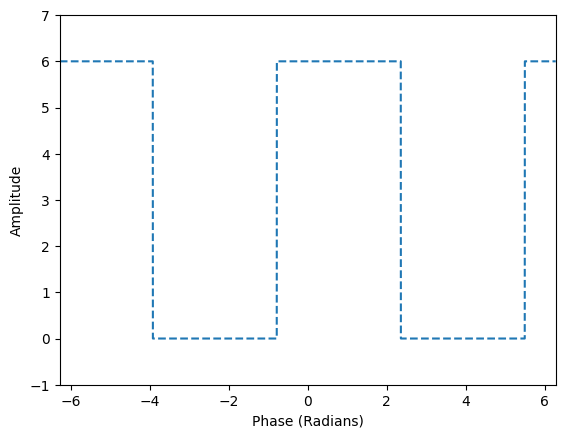

In [3]:
def squarewave(x, amplitude = 3, dcbias=3, phase=np.pi/4):
    return signal.square(x+phase)*amplitude+dcbias

fs = 1000
x = np.arange(-2*np.pi, 2*np.pi, 1/fs)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()


The first Fourier Series coefficient, denoted as $a_0$, is the DC bias of a periodic waveform and is calculated using

$$
a_0 = \frac{1}{2\pi}\int\limits_{-\pi}^\pi g(x) \,dx.
$$

We can leverage the scipy `integrate.quad` function to compute $a_0$ across the periodic interval $[-\pi, \pi]$ and obtain the DC bias of the square wave.

In [4]:
a0 = integrate.quad(squarewave, -np.pi, np.pi)[0]/(2*np.pi)
print('The DC bias is ' + str(a0) + '.')

The DC bias is 3.0.


The cosine and sine Fourier Series coefficients are denoted as $a_n$ and $b_n$, respectively, where $n=1,2,3, ...$ The cosine coefficients are defined as

$$
a_n = \frac{1}{\pi}\int\limits_{-\pi}^\pi g(x)\cos{(nx)} \,dx.
$$

The sine coefficients are computed using

$$
b_n = \frac{1}{\pi}\int\limits_{-\pi}^\pi g(x)\sin{(nx)} \,dx.
$$

We can define functions for each of the terms inside the integrals of the above equations. Then, integrate the functions over the interval $[-\pi, \pi]$ to obtain the first Fourier Series coefficients for the cosine and sine waves, which are denoted as $a_1$ and $b_1$.

In [5]:
def gcos(x, g, n):
    return g(x)*np.cos(n*x)

def gsin(x, g, n):
    return g(x)*np.sin(n*x)

g = squarewave
n = 1
a1 = integrate.quad(gcos, -np.pi, np.pi, args=(g, n))[0]/(np.pi)
b1 = integrate.quad(gsin, -np.pi, np.pi, args=(g, n))[0]/(np.pi)

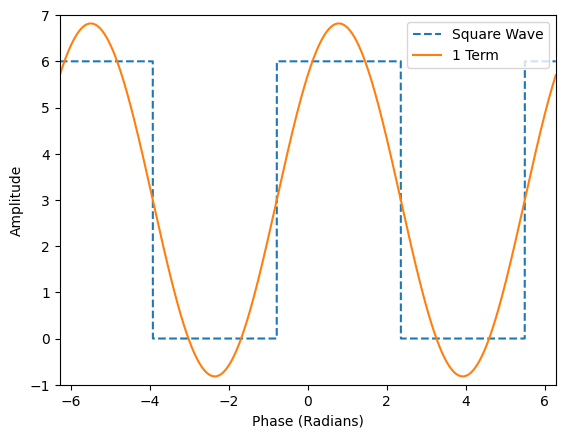

In [6]:
s1 = a0 + a1*np.cos(n*x) + b1*np.sin(n*x)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s1, label='1 Term')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()


In [7]:
n = 3
a3 = integrate.quad(gcos, -np.pi, np.pi, args=(g, n))[0]/np.pi
b3 = integrate.quad(gsin, -np.pi, np.pi, args=(g, n))[0]/np.pi

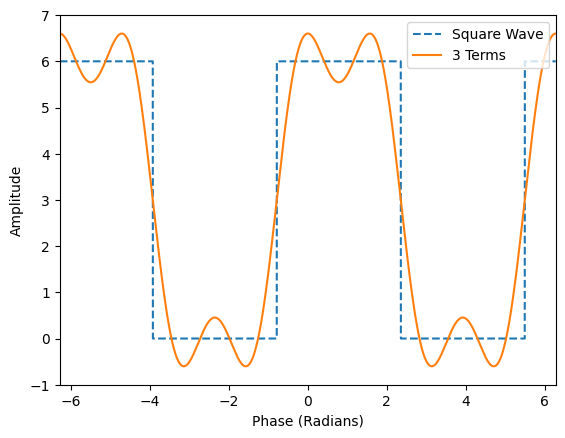

In [8]:
s3 = s1 + a3*np.cos(n*x) + b3*np.sin(n*x)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s3, label='3 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()


In [9]:
def fourier_coeffs(x, g, n, a=-np.pi, b=np.pi):
    an, bn = np.zeros(n), np.zeros(n)
    a0 = integrate.quad(g, a, b)[0]/(b-a)
    for i in range(1, n + 1):
        an[i-1] = integrate.quad(gcos, a, b, args=(g, i))[0]*2/(b-a)
        bn[i-1] = integrate.quad(gsin, a, b, args=(g, i))[0]*2/(b-a)
    return a0, an, bn


In [10]:
def fourier_sum(x, a0, an, bn, n=None):
    if n == None or n > len(an):
        n = len(an)
    s = np.ones(len(x))*a0
    for i in range(1, n + 1):
        s += an[i-1]*np.cos(i*x) + bn[i-1]*np.sin(i*x)
    return s


In [11]:
a0, an, bn = fourier_coeffs(x, squarewave, n=26)

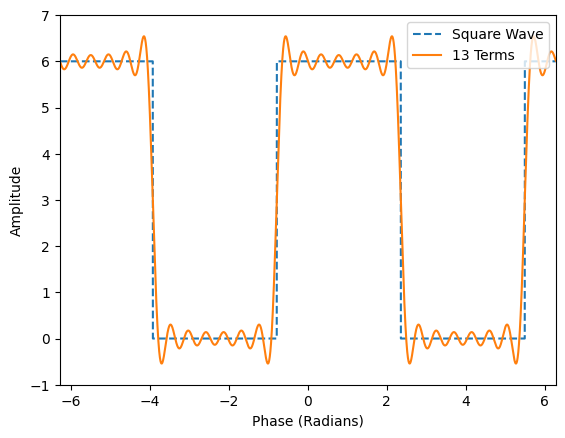

In [12]:
s = fourier_sum(x, a0, an, bn, n=13)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s, label='13 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()


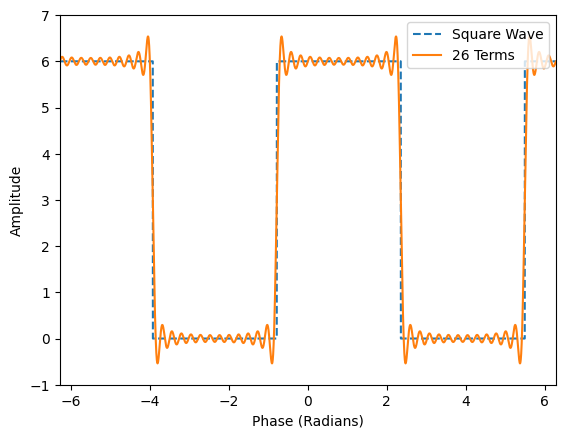

In [13]:
s = fourier_sum(x, a0, an, bn, n=26)
plt.plot(x, squarewave(x), label='Square Wave', linestyle='dashed')
plt.plot(x, s, label='26 Terms')
plt.ylim([-1, 7])
plt.xlim([-2*np.pi, 2*np.pi])
plt.legend(loc='upper right')
plt.xlabel('Phase (Radians)')
plt.ylabel('Amplitude')
plt.show()


### Sawtooth Function



In [14]:
def sawtoothwave(x, amplitude=0.5, dcbias=0.5, phase=np.pi):
    return signal.sawtooth(x+phase)*amplitude+dcbias

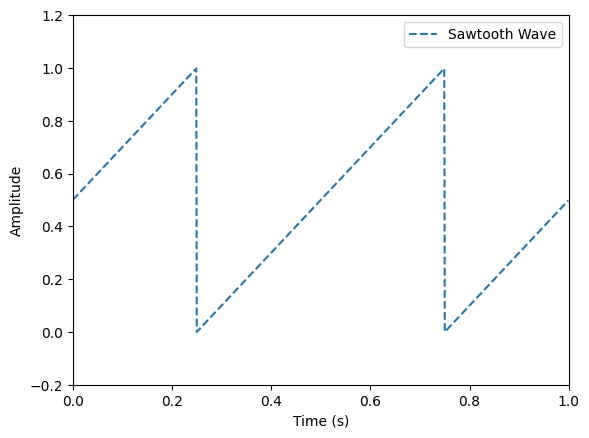

In [15]:
fs = 1e3
T = 1/2
ts = np.arange(0, 1, 1/fs)
x = 2*np.pi*ts/T
plt.plot(ts, sawtoothwave(x), label='Sawtooth Wave', linestyle='dashed')
plt.ylim([-0.2, 1.2])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


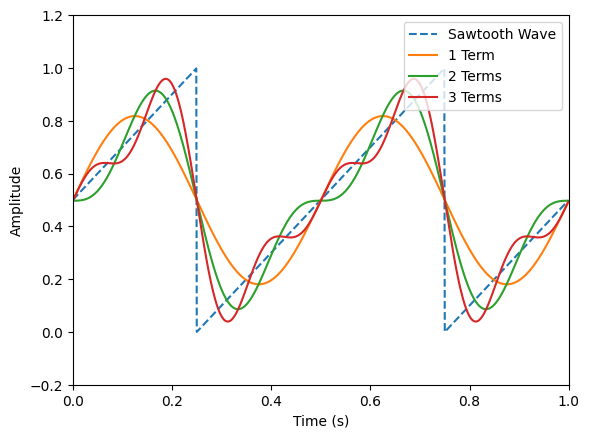

In [16]:
a0, an, bn = fourier_coeffs(x, sawtoothwave, n=5, a=x[0], b=x[-1])
s1 = fourier_sum(x, a0, an, bn, n=1)
s2 = fourier_sum(x, a0, an, bn, n=2)
s3 = fourier_sum(x, a0, an, bn, n=3)
plt.plot(ts, sawtoothwave(x), label='Sawtooth Wave', linestyle='dashed')
plt.plot(ts, s1, label='1 Term')
plt.plot(ts, s2, label='2 Terms')
plt.plot(ts, s3, label='3 Terms')
plt.ylim([-0.2, 1.2])
plt.xlim([0.0, 1.0])
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


### Euler's formula

$$
e^{j\theta} = \cos{(\theta)} + j\sin{(\theta)}.
$$


In [17]:
np.e

2.718281828459045

In [18]:
c = np.cos(np.pi/8) + 1j*np.sin(np.pi/8)
np.round(c, 4)

np.complex128(0.9239+0.3827j)

In [19]:
c = np.e**(1j*np.pi/8)
np.round(c, 4)

np.complex128(0.9239+0.3827j)